eksperimen 1:
1. removing stopwords (describe)
2. create long string (checklist)
3. combine both string and labels
4. train test split
5. model

eksperimen 2:
1. get keywords from rake
2. combine all sentences
3. got the most frequent words
4. combine with checklist => turn all symtoms
5. for the training: combine both raw describe and checklist symptoms
6. turn the combined into number based onn no. 4
7. model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
path_des = "/content/drive/MyDrive/capstone/ml code (celia iseng)/describe/Symptom2Disease.csv"
df_des = pd.read_csv(path_des)

In [3]:
!pip install rake-nltk
import nltk
from rake_nltk import Rake
nltk.download('stopwords')
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
#remove function
def keywords(text):
  key_arr = []
  r = Rake()
  r.extract_keywords_from_text(text)
  for rating, keyword in r.get_ranked_phrases_with_scores():
    key_arr.append(keyword)
  return key_arr

def sen(arr):
  s = " ".join([str(item) for item in arr])
  return s

In [5]:
sentences_des = []
for i in df_des['text'].values.tolist():
  sentences_des.append(sen(keywords(i)))

In [6]:
df_des['keyword'] = sentences_des

In [7]:
df_des

,Unnamed: 0,label,text,keyword
0,0,Psoriasis,I have been experiencing a skin rash on my arm...,skin rash scaly patches weeks torso red past l...
1,1,Psoriasis,"My skin has been peeling, especially on my kne...",stinging sensation often accompanied skin scal...
2,2,Psoriasis,I have been experiencing joint pain in my fing...,experiencing joint pain often achy gets worse ...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp...",silver like dusting small scales lower back du...
4,4,Psoriasis,"My nails have small dents or pits in them, and...",often feel inflammatory small dents minor rash...
...,...,...,...,...
1195,295,diabetes,I'm shaking and trembling all over. I've lost ...,occasionally get palpitations speeding heart t...
1196,296,diabetes,"Particularly in the crevices of my skin, I hav...",cuts take skin rashes skin bruises skin well p...
1197,297,diabetes,I regularly experience these intense urges and...,frequently feel drowsy also significantly lost...
1198,298,diabetes,"I have trouble breathing, especially outside. ...",urinary tract infections yeast infections trou...


In [8]:
df_des.label.unique()

array(['Psoriasis', 'Varicose Veins', 'Typhoid', 'Chicken pox',
       'Impetigo', 'Dengue', 'Fungal infection', 'Common Cold',
       'Pneumonia', 'Dimorphic Hemorrhoids', 'Arthritis', 'Acne',
       'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Jaundice', 'Malaria',
       'urinary tract infection', 'allergy',
       'gastroesophageal reflux disease', 'drug reaction',
       'peptic ulcer disease', 'diabetes'], dtype=object)

In [9]:
print(df_des.loc[df_des['label'] == df_des.label.unique()[0]])

    Unnamed: 0      label                                               text  \
0            0  Psoriasis  I have been experiencing a skin rash on my arm...   
1            1  Psoriasis  My skin has been peeling, especially on my kne...   
2            2  Psoriasis  I have been experiencing joint pain in my fing...   
3            3  Psoriasis  There is a silver like dusting on my skin, esp...   
4            4  Psoriasis  My nails have small dents or pits in them, and...   
5            5  Psoriasis  The skin on my palms and soles is thickened an...   
6            6  Psoriasis  The skin around my mouth, nose, and eyes is re...   
7            7  Psoriasis  My skin is very sensitive and reacts easily to...   
8            8  Psoriasis  I have noticed a sudden peeling of skin at dif...   
9            9  Psoriasis  The skin on my genitals is red and inflamed. I...   
10          10  Psoriasis  I have experienced fatigue and a general feeli...   
11          11  Psoriasis  The rash on m

In [10]:
sentences_long = []
diseases = []
for label in df_des.label.unique():
  key = df_des.loc[df_des['label'] == label, 'keyword']
  key = key.tolist()
  long_sentence = " ".join([str(item) for item in key])
  sentences_long.append(long_sentence)
  diseases.append(label)

In [11]:
df_new = {'Diseases': diseases,'sentences_long': sentences_long}
df_new = pd.DataFrame(df_new)
print(df_new) 

                           Diseases  \
0                         Psoriasis   
1                    Varicose Veins   
2                           Typhoid   
3                       Chicken pox   
4                          Impetigo   
5                            Dengue   
6                  Fungal infection   
7                       Common Cold   
8                         Pneumonia   
9             Dimorphic Hemorrhoids   
10                        Arthritis   
11                             Acne   
12                 Bronchial Asthma   
13                     Hypertension   
14                         Migraine   
15             Cervical spondylosis   
16                         Jaundice   
17                          Malaria   
18          urinary tract infection   
19                          allergy   
20  gastroesophageal reflux disease   
21                    drug reaction   
22             peptic ulcer disease   
23                         diabetes   

                        

In [12]:
len(df_des.label.unique())

24

menyerah..... ga nemu sesuatu yang bagus dengan cara ini

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Example documents
documents = df_new['sentences_long'].values.tolist()

# Create an instance of TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the documents and transform them into TF-IDF vectors
tfidf_vectors = vectorizer.fit_transform(documents)

# Get the feature names (terms)
feature_names = vectorizer.get_feature_names_out()

# Store the top 5 words for each document in an array
top_words = []

# Retrieve and store the top 5 words for each document
for i in range(len(documents)):
    feature_index = tfidf_vectors[i].nonzero()[1]
    tfidf_scores = tfidf_vectors[i, feature_index].toarray()[0]

    # Create a dictionary to store term-score pairs
    term_scores = {}
    for j, index in enumerate(feature_index):
        term = feature_names[index]
        tfidf_score = tfidf_scores[j]
        term_scores[term] = tfidf_score

    # Sort the terms based on their scores and retrieve the top 5
    top_terms = sorted(term_scores, key=term_scores.get, reverse=True)[:5]
    top_words.append(" ".join(top_terms))

# Convert the top_words list into a NumPy array
top_words_array = np.array(top_words)

print(top_words_array)


['skin nails peeling dents elbows' 'legs veins calves causing periods'
 'constipation diarrhea fever belly pain' 'spots red fever arms causing'
 'sores nose face yellow rash' 'pain back fever spots eyes'
 'skin rest different bumps lumps' 'throat sinuses coughing nose sneezing'
 'heart phlegm coughing brownish sweating' 'anus stool go really bowel'
 'stiff joints walking neck muscles' 'blackheads skin pimples pus filled'
 'cough fever mucoid high thick' 'headache chest dizziness balance pain'
 'visual vision indigestion headaches acid'
 'cough back neck weakness balance' 'yellow weight urine lost skin'
 'headache chills perspiring nausea high' 'pee urinate urine low blood'
 'throat eyes occasionally nose lips' 'throat heartburn eating chest sour'
 'chest hair skin occasionally rashes' 'stools weight feel acidic upper'
 'infections throat palpitations feel dry']


In [14]:
df_new['top_words'] = top_words_array

In [15]:
df_new

,Diseases,sentences_long,top_words
0,Psoriasis,skin rash scaly patches weeks torso red past l...,skin nails peeling dents elbows
1,Varicose Veins,see prominent veins past couple tired seems ra...,legs veins calves causing periods
2,Typhoid,get chills every night really uncomfortable mi...,constipation diarrhea fever belly pain
3,Chicken pox,experiencing intense itching skin red rash inf...,spots red fever arms causing
4,Impetigo,red sores skin rash rash worried neck made hea...,sores nose face yellow rash
5,Dengue,facing severe joint pain skin rash intense itc...,pain back fever spots eyes
6,Fungal infection,raised lumps looks red discoloured areas diffe...,skin rest different bumps lumps
7,Common Cold,also really cold really runny really high stop...,throat sinuses coughing nose sneezing
8,Pneumonia,feeling really cold beating really fast tired ...,heart phlegm coughing brownish sweating
9,Dimorphic Hemorrhoids,quite inflamed extremely bloody bowel motions ...,anus stool go really bowel


In [16]:
des_diseases = df_new['Diseases'].values.tolist()
des_sentences = df_new['top_words'].values.tolist()

In [17]:
print(type(des_diseases))
print(type(des_sentences))

<class 'list'>
<class 'list'>


kerjain yang ceklis

In [18]:
path_check = "/content/drive/MyDrive/capstone/ml code (celia iseng)/checklist/dataset.csv"
df_check = pd.read_csv(path_check)
symptoms_check = df_check.drop(columns=['Disease'])

In [19]:
import numpy as np
symptoms_check = symptoms_check.to_numpy()

In [20]:
sentences_check = []
for i in symptoms_check:
  #print(i)
  s = " ".join([str(item).replace("_", " ") for item in i if str(item) != "nan"])
  sentences_check = np.append(sentences_check,s)
print(sentences_check)

['itching  skin rash  nodal skin eruptions  dischromic  patches'
 ' skin rash  nodal skin eruptions  dischromic  patches'
 'itching  nodal skin eruptions  dischromic  patches' ...
 ' burning micturition  bladder discomfort  foul smell of urine  continuous feel of urine'
 ' skin rash  joint pain  skin peeling  silver like dusting  small dents in nails  inflammatory nails'
 ' skin rash  high fever  blister  red sore around nose  yellow crust ooze']


In [21]:
sentences_check = sentences_check.tolist()

In [22]:
check_diseases = df_check['Disease']
check_diseases = check_diseases.values.tolist()

In [23]:
print(type(sentences_check))
print(type(check_diseases))

<class 'list'>
<class 'list'>


combining for tokenizing

In [24]:
key_diseases = check_diseases + des_diseases
key_symptoms = sentences_check + des_sentences

In [27]:
df_key = {'key_diseases': key_diseases,'key_symptoms': key_symptoms}
df_key = pd.DataFrame(df_key)
print(df_key) 

                         key_diseases  \
0                    Fungal infection   
1                    Fungal infection   
2                    Fungal infection   
3                    Fungal infection   
4                    Fungal infection   
...                               ...   
4939                          allergy   
4940  gastroesophageal reflux disease   
4941                    drug reaction   
4942             peptic ulcer disease   
4943                         diabetes   

                                           key_symptoms  
0     itching  skin rash  nodal skin eruptions  disc...  
1      skin rash  nodal skin eruptions  dischromic  ...  
2     itching  nodal skin eruptions  dischromic  pat...  
3               itching  skin rash  dischromic  patches  
4              itching  skin rash  nodal skin eruptions  
...                                                 ...  
4939                 throat eyes occasionally nose lips  
4940                 throat heartburn eatin

In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
def label_encode(labels):
    label_encoder.fit(labels)
    label_sequences = label_encoder.transform(labels)
    return label_sequences

df_key['label_encoded'] = label_encode(df_key['key_diseases'])

In [30]:
df_key

,key_diseases,key_symptoms,label_encoded
0,Fungal infection,itching skin rash nodal skin eruptions disc...,16
1,Fungal infection,skin rash nodal skin eruptions dischromic ...,16
2,Fungal infection,itching nodal skin eruptions dischromic pat...,16
3,Fungal infection,itching skin rash dischromic patches,16
4,Fungal infection,itching skin rash nodal skin eruptions,16
...,...,...,...
4939,allergy,throat eyes occasionally nose lips,43
4940,gastroesophageal reflux disease,throat heartburn eating chest sour,46
4941,drug reaction,chest hair skin occasionally rashes,45
4942,peptic ulcer disease,stools weight feel acidic upper,48


In [33]:
vocab_size = 2000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
#training_portion = .8

In [34]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt

In [36]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(key_symptoms)
word_index = tokenizer.word_index

combining for training 

bedanya dengan tokenizing: 

kalau tokenizing: sentences_check + des_sentences

for training: sentences_check + df_des['text']

In [40]:
symptoms = sentences_check + df_des['text'].values.tolist()
diseases = check_diseases + df_des['label'].values.tolist()

In [41]:
df = {'diseases': diseases,'symptoms': symptoms}
df = pd.DataFrame(df)
print(df) 

              diseases                                           symptoms
0     Fungal infection  itching  skin rash  nodal skin eruptions  disc...
1     Fungal infection   skin rash  nodal skin eruptions  dischromic  ...
2     Fungal infection  itching  nodal skin eruptions  dischromic  pat...
3     Fungal infection            itching  skin rash  dischromic  patches
4     Fungal infection           itching  skin rash  nodal skin eruptions
...                ...                                                ...
6115          diabetes  I'm shaking and trembling all over. I've lost ...
6116          diabetes  Particularly in the crevices of my skin, I hav...
6117          diabetes  I regularly experience these intense urges and...
6118          diabetes  I have trouble breathing, especially outside. ...
6119          diabetes  I constantly sneeze and have a dry cough. My i...

[6120 rows x 2 columns]


In [43]:
print(len(df.diseases.unique()))
print(len(df_key.key_diseases.unique()))

50
50


In [44]:
df['label_encoded'] = label_encode(df['diseases'])

In [45]:
df

,diseases,symptoms,label_encoded
0,Fungal infection,itching skin rash nodal skin eruptions disc...,16
1,Fungal infection,skin rash nodal skin eruptions dischromic ...,16
2,Fungal infection,itching nodal skin eruptions dischromic pat...,16
3,Fungal infection,itching skin rash dischromic patches,16
4,Fungal infection,itching skin rash nodal skin eruptions,16
...,...,...,...
6115,diabetes,I'm shaking and trembling all over. I've lost ...,44
6116,diabetes,"Particularly in the crevices of my skin, I hav...",44
6117,diabetes,I regularly experience these intense urges and...,44
6118,diabetes,"I have trouble breathing, especially outside. ...",44


code everything

In [46]:
train_sequences = tokenizer.texts_to_sequences(df['symptoms'].values.tolist())
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_padded,df['label_encoded'].values.tolist(), test_size = 0.2, random_state=1)

training

In [48]:
def create_model(vocab_size, embedding_dim, max_length):
  model = models.Sequential([
  layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  layers.GlobalAveragePooling1D(),
  layers.Dense(24, activation='relu'),
  layers.Dense(50, activation='softmax')
  ])

  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=optimizers.Adam(),
                metrics=['accuracy'])
  
  return model

In [49]:
model = create_model(vocab_size, embedding_dim, max_length)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           32000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 50)                1250      
                                                                 
Total params: 33,658
Trainable params: 33,658
Non-trainable params: 0
_________________________________________________________________


In [50]:
train_labels = np.array(y_train)
validation_labels = np.array(y_val)

train_labels = train_labels.reshape(len(train_labels), 1)
validation_labels = validation_labels.reshape(len(validation_labels), 1)

In [52]:
num_epochs = 35
history = model.fit(x_train, train_labels, 
                    epochs=num_epochs, 
                    validation_data=(x_val, validation_labels))

Epoch 1/35
153/153 [==============================] - 4s 11ms/step - loss: 3.8916 - accuracy: 0.0284 - val_loss: 3.8682 - val_accuracy: 0.0253
Epoch 2/35
153/153 [==============================] - 1s 8ms/step - loss: 3.8203 - accuracy: 0.0284 - val_loss: 3.7909 - val_accuracy: 0.0212
Epoch 3/35
153/153 [==============================] - 1s 6ms/step - loss: 3.6992 - accuracy: 0.0699 - val_loss: 3.6165 - val_accuracy: 0.1144
Epoch 4/35
153/153 [==============================] - 1s 7ms/step - loss: 3.4621 - accuracy: 0.1358 - val_loss: 3.3002 - val_accuracy: 0.1814
Epoch 5/35
153/153 [==============================] - 1s 6ms/step - loss: 3.1005 - accuracy: 0.1985 - val_loss: 2.9102 - val_accuracy: 0.3113
Epoch 6/35
153/153 [==============================] - 1s 4ms/step - loss: 2.7350 - accuracy: 0.3411 - val_loss: 2.5567 - val_accuracy: 0.4444
Epoch 7/35
153/153 [==============================] - 1s 4ms/step - loss: 2.4039 - accuracy: 0.4816 - val_loss: 2.2406 - val_accuracy: 0.5842
Epoch

In [53]:
from sklearn.metrics import classification_report
pred = model.predict(x_val, batch_size=32, verbose=1)
predicted = np.argmax(pred, axis=1)
report = classification_report(validation_labels, predicted)
print(report)

39/39 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.92      1.00      0.96        33
           6       0.72      0.91      0.81        32
           7       0.96      0.96      0.96        26
           8       0.77      0.83      0.80        29
           9       1.00      1.00      1.00        22
          10       0.83      0.77      0.80        31
          11       0.85      0.85      0.85        33
          12       1.00      1.00      1.00        23
          13       1.00      0.60      0.75         5
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        27
          16       0.94     

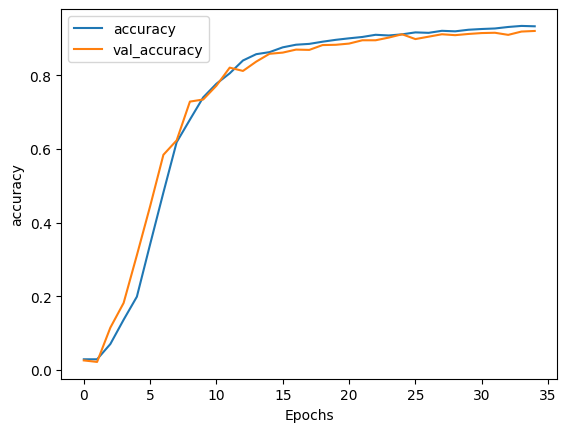

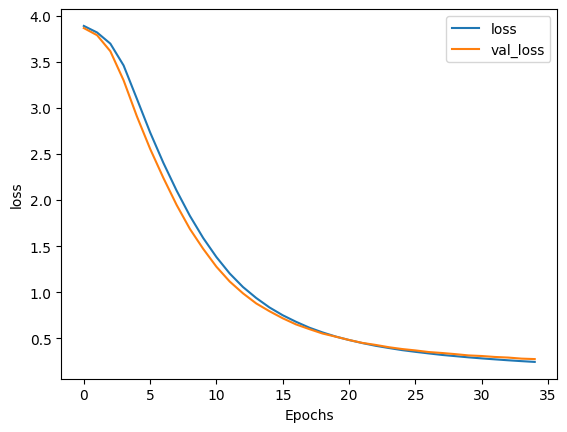

In [54]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [55]:
filepath = "/content/drive/MyDrive/capstone/ml code (celia iseng)/Eksperimen~~/model experimen 2/model.h5"

In [56]:
model.save(filepath, save_format='h5')

In [57]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

In [58]:
import tensorflowjs as tfjs

In [59]:
tfjs.converters.save_keras_model(model, "/content/drive/MyDrive/capstone/ml code (celia iseng)/Eksperimen~~/model experimen 2/")

In [60]:
word_index = tokenizer.word_index

In [61]:
index_to_word = {index: word for word, index in word_index.items()}

In [62]:
dict_input = pd.DataFrame.from_dict(index_to_word, orient='index', columns=['Word'])

In [63]:
csv_filename = '/content/drive/MyDrive/capstone/ml code (celia iseng)/Eksperimen~~/model experimen 2/dict_input.csv'
dict_input.to_csv(csv_filename)

In [66]:
label_mapping = {label: encoded_label for label, encoded_label in zip(df['diseases'].tolist(),df['label_encoded'].tolist())}

In [67]:
dict_output = pd.DataFrame.from_dict(label_mapping, orient='index', columns=['EncodedLabel'])
dict_output.index.name = 'OriginalLabel'

In [69]:
csv_filename = '/content/drive/MyDrive/capstone/ml code (celia iseng)/Eksperimen~~/model experimen 2/dict_output.csv'
dict_output.to_csv(csv_filename)